In [149]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import os
import time
import pickle

from util import *
import scanpy.api as sc
import data_loader as dl 
import scdd as sd

%matplotlib inline
%load_ext autoreload
%autoreload 2

from matplotlib import rcParams

params = {
   'axes.labelsize': 16,
   'font.size': 16,
   'legend.fontsize': 10,
   'xtick.labelsize': 13,
   'ytick.labelsize': 13,
   'text.usetex': False,
   'text.usetex': False,
   }
rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
output_folder = './figures/figure_tradeoff_curve'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Statistics for the datasets

In [205]:
## Collect the data

dataset={}
dataset['brain_1k'] = dl.load_10x_1k() # 1k brain cells 
dataset['brain_2k'] = dl.load_10x_2k() # 2k brain cells 
dataset['brain_9k'] = dl.load_10x_9k() # 9k brain cells 
dataset['brain_1.3m'] = dl.load_10x_1_3mil() # 1.3 million brain cells 
dataset['pbmc_3k'] = dl.load_10x_3k() # 3k PBMC cells 
dataset['pbmc_4k'] = dl.load_10x_4k() # 4k PBMC cells
dataset['pbmc_6k'] = dl.load_10x_6k() # 6k PBMC cells 
dataset['pbmc_8k'] = dl.load_10x_8k() # 8k PBMC cells 
dataset['pbmc_33k'] = dl.load_10x_33k() # 33k PBMC cells 
dataset['pbmc_68k'] = dl.load_10x_68k() # 68k PBMC cells 
dataname_list = list(dataset.keys())

data_param_dic = {}
mean_count_dic = {}
finger_print_dic = {}
for dname in dataset.keys():
#     if dname == 'brain_1.3m':
#         continue
    print(dname)
    data = dataset[dname]
    data = sc.pp.filter_genes(data,min_counts=0.01*data.shape[0],copy=True)
    Nc,G,Nr,Nr_bar = sd.get_info(data)
    data_param_dic[dname] = [Nc,G,Nr,Nr_bar]
    mean_count = np.array(data.X.mean(axis=0)).reshape(-1)
    mean_count = np.sort(mean_count)[::-1]
    mean_count_dic[dname] = mean_count
    finger_print_dic[dname] = sd.get_fingerprint(data)

fname = output_folder+'/data/dataset_statistics.pickle'
f_myfile = open(fname,'wb')
pickle.dump(data_param_dic, f_myfile)
pickle.dump(mean_count_dic, f_myfile)
pickle.dump(finger_print_dic, f_myfile)
f_myfile.close()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
brain_1k
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
## Nc=931, G=12343, Nr=11518.30, Nr_bar=0.93
brain_2k
Variable names are not u

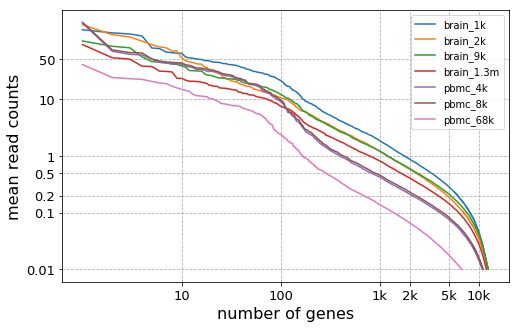

In [236]:
## Figure generation
fname = output_folder+'/data/dataset_statistics.pickle'
f_myfile = open(fname, 'rb')
data_param_dic = pickle.load(f_myfile)
mean_count_dic = pickle.load(f_myfile)
finger_print_dic = pickle.load(f_myfile)
f_myfile.close()

## Generate the figures 
plt.figure(figsize=[8,5])
for dname in data_param_dic.keys():
    
    Nc,G,Nr,Nr_bar = data_param_dic[dname]
    mean_count = mean_count_dic[dname]
    
    
#     plt.plot(np.arange(G)+1,np.log10(mean_count),label=dname)
    plt.plot(np.log10(np.arange(G)+1),np.log10(mean_count),label=dname)
#     plt.plot(np.arange(G),mean_count,label=dname)
    plt.xlabel('number of genes')
    plt.ylabel('mean read counts')
#     plt.title(dname)

xtick_ = [10,100,1000,2000,5000,10000]
xtick_str = [10,100,'1k','2k','5k','10k']
plt.xticks(np.log10(xtick_),xtick_str)

ytick_ = [0.01,0.1,0.2,0.5,1,10,50]
plt.yticks(np.log10(ytick_),ytick_)

plt.legend()
plt.grid(ls='--')
plt.savefig(output_folder+'/param_'+dname+'.png')
plt.savefig(output_folder+'/param_'+dname+'.pdf')
plt.show()

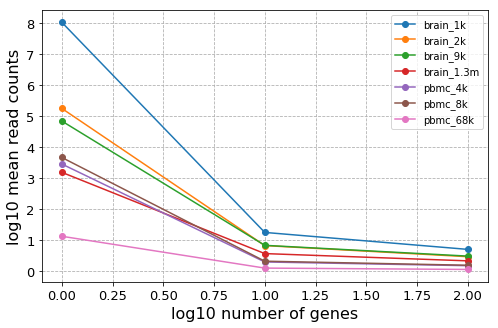

In [211]:
## Figure generation
fname = output_folder+'/data/dataset_statistics.pickle'
f_myfile = open(fname, 'rb')
data_param_dic = pickle.load(f_myfile)
mean_count_dic = pickle.load(f_myfile)
finger_print_dic = pickle.load(f_myfile)
f_myfile.close()

## Generate the figures 
plt.figure(figsize=[8,5])
for dname in data_param_dic.keys():
    
    Nc,G,Nr,Nr_bar = data_param_dic[dname]
    mean_count = mean_count_dic[dname]
    fp = finger_print_dic[dname]
    
#     plt.plot(np.arange(G)+1,np.log10(mean_count),label=dname)
#     mean_quantile = [mean_count[0:10].mean(),mean_count[0:100].mean(),mean_count[0:1000].mean()]
#     mean_quantile = np.array(mean_quantile)
    plt.plot(np.arange(fp.shape[0]),fp,\
             marker='o',label=dname)
#     plt.plot(np.arange(G),mean_count,label=dname)
    plt.xlabel('log10 number of genes')
    plt.ylabel('log10 mean read counts')
#     plt.title(dname)
plt.legend()
plt.grid(ls='--')
plt.savefig(output_folder+'/param_'+dname+'.png')
plt.savefig(output_folder+'/param_'+dname+'.pdf')
plt.show()

# Statistics for the subsample experiments

## Computation

## Nc=1306127, G=72, Nr=1263.70, Nr_bar=17.55


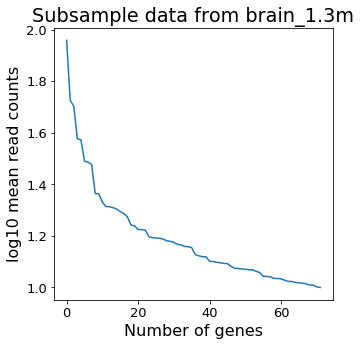

In [212]:
data_subsample = dl.load_10x_1_3mil_subsample()
Nc_subsample,G_subsample,Nr_subsample,Nr_bar_subsample = sd.get_info(data_subsample)
B_subsample = Nc_subsample*Nr_subsample

mean_count = np.array(data_subsample.X.mean(axis=0)).reshape(-1)
mean_count = np.sort(mean_count)[::-1]
plt.figure(figsize=[5,5])
plt.plot(np.arange(G_subsample),np.log10(mean_count))
plt.xlabel('Number of genes')
plt.ylabel('log10 mean read counts')
plt.title('Subsample data from brain_1.3m')
plt.savefig(output_folder+'/param_subsampled_data.png')
plt.savefig(output_folder+'/param_subsampled_data.pdf')
plt.show()

Nr_bar_list = [0.02,0.05,0.1,0.2,0.5,1,2,5,10]
B_sub_list = [int(B_subsample/37500), int(B_subsample/7500),int(B_subsample/1500),int(B_subsample/300)]
subsample_param_dic = {}
for B_sub in B_sub_list:    
    Nc_list = []
    for Nr_bar in Nr_bar_list:
        Nc_list.append(int(B_sub/Nr_bar/G_subsample))
        subsample_param_dic[B_sub] = [Nr_bar_list,Nc_list]
        
fname = output_folder+'/data/subsample_param.pickle'
f_myfile = open(fname,'wb')
pickle.dump(B_sub_list, f_myfile)
pickle.dump(subsample_param_dic, f_myfile)
f_myfile.close()

## Figure generation

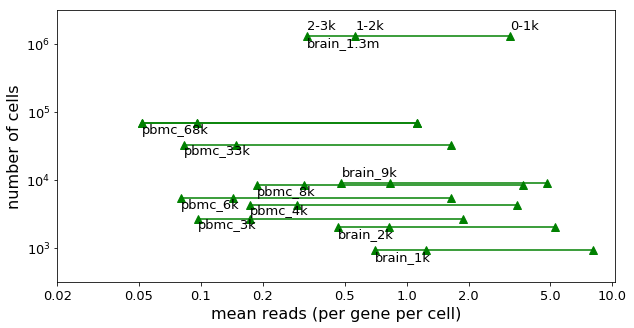

In [216]:
## Read data statistics 
fname = output_folder+'/data/dataset_statistics.pickle'
f_myfile = open(fname, 'rb')
data_param_dic = pickle.load(f_myfile)
mean_count_dic = pickle.load(f_myfile)
finger_print_dic = pickle.load(f_myfile)
f_myfile.close()

## Read subsample parameters
fname = output_folder+'/data/subsample_param.pickle'
f_myfile = open(fname, 'rb')
B_sub_list = pickle.load(f_myfile)
subsample_param_dic = pickle.load(f_myfile)
f_myfile.close()

## Generate the subsample parameter figure 
plt.figure(figsize=[10,5])
#for B_sub in subsample_param_dic.keys():
#    Nr_bar_list,Nc_list = subsample_param_dic[B_sub]
#    Nc_list = np.array(Nc_list)
#    Nr_bar_list = np.array(Nr_bar_list)
#    plt.plot(np.log10(Nr_bar_list),np.log10(Nc_list),marker='o',color='steelblue')
#    plt.annotate('B_bar=%0.1fk'%(B_sub/1000/72),[np.log10(Nr_bar_list[0])+0.05,np.log10(Nc_list[0])-0.05],fontsize=13)
#plt.plot(np.log10(Nr_bar_list),np.log10(Nc_list),marker='o',color='steelblue',label='Budget')
    
for dname in data_param_dic.keys():
    fp = finger_print_dic[dname]
    fp = np.log10(fp)
    Nc,G,Nr,Nr_bar = data_param_dic[dname]
    plt.plot(fp,np.log10(Nc)*np.ones(fp.shape[0]),marker='^',color='green',zorder=10,ms=8)
    if dname=='brain_9k':
        plt.annotate(dname,[fp[2],np.log10(Nc)+0.1],fontsize=13,zorder=10)
    else:
        plt.annotate(dname,[fp[2],np.log10(Nc)-0.15],fontsize=13,zorder=10)
    
    if dname=='brain_1.3m':
        plt.annotate('0-1k',[fp[0],np.log10(Nc)+0.1],fontsize=13)
        plt.annotate('1-2k',[fp[1],np.log10(Nc)+0.1],fontsize=13)
        plt.annotate('2-3k',[fp[2],np.log10(Nc)+0.1],fontsize=13)
#         plt.annotate('3-4k',[fp[3],np.log10(Nc)+0.1],fontsize=13)
plt.plot(fp,np.log10(Nc)*np.ones(fp.shape[0]),marker='^',color='green',zorder=10,ms=8,label='Dataset')

# plt.plot([np.log10(0.2),np.log10(0.2)],[1.8,6.7],color='red',ls='--',label='Reliable detection threshold')

plt.xlabel('mean reads (per gene per cell)')
plt.ylabel('number of cells')


plt.xticks(np.log10(Nr_bar_list),Nr_bar_list)
plt.yticks([3,4,5,6],['$10^3$','$10^4$','$10^5$','$10^6$'])
plt.ylim([2.5,6.5])
# plt.title('Budget')
# plt.legend(fontsize=13)
plt.savefig(output_folder+'/subsample_param.png')
plt.savefig(output_folder+'/subsample_param.pdf')
plt.show()

# Tradeoff curve

## Computation

In [188]:
A = data_subsample.X.data
IA = data_subsample.X.indptr
JA = data_subsample.X.indices
A = A.clip(max=np.percentile(A,99.9)).astype(int)
X_new = sp.sparse.csr_matrix((A,JA,IA))
data_subsample.X = X_new

In [189]:
np.sum(np.array((data_subsample.X - X_new).todense())!=0)

0

array([14.,  6., 13., ..., 45., 24., 31.], dtype=float32)

In [194]:
## Compute the ground truth
data_subsample = dl.load_10x_1_3mil_subsample()

# A = data_subsample.X.data
# IA = data_subsample.X.indptr
# JA = data_subsample.X.indices
# A = A.clip(max=np.percentile(A,99.9)).astype(int)
# X_new = sp.sparse.csr_matrix((A,JA,IA))
# data_subsample.X = X_new

Nc,G,Nr,Nr_bar = sd.get_info(data_subsample)

## CV estimation
M_ml_full,M_dd_full = sd.dd_1d_moment(data_subsample)
M_true = M_ml_full
cv_true = sd.M_to_cv(M_ml_full)
gamma_param_true = sd.M_to_gamma(M_true)

mean_ml_full,cov_ml_full,PeCo_ml_full = sd.ml_covariance(data_subsample)
cov_true = cov_ml_full
PeCo_true = PeCo_ml_full
_,V_true = np.linalg.eigh(cov_true)
p0_true,_ = sd.dd_zero_prob(data_subsample)
    
# cv_ml_full = sd.M_to_cv(M_ml_full)
# cv_dd_full = sd.M_to_cv(M_dd_full)
# ## Convariance matrix and Pearson correlation
# mean_dd_full,cov_dd_full,PC_dd_full = sd.dd_covariance(data_subsample)
# mean_ml_full,cov_ml_full,PC_ml_full = sd.ml_covariance(data_subsample)
# ## PCA components
# _,V_ml_full = np.linalg.eigh(cov_ml_full)
# _,V_dd_full = np.linalg.eigh(cov_dd_full)

## Nc=1306127, G=72, Nr=1263.70, Nr_bar=17.55
#time start: 0.0s
n_cell=1306127, n_gene=72
#total: 1.74s
#time start: 0.0s
n_cell=1306127, n_gene=72, Nr=1263.7
#total: 28.76s
# time start: 0.0s
n_cell=1306127, n_gene=72
# total time: 6.3s


In [154]:
## diagnosis
data = sc.read(subsample_folder+'/data_44014_0.05_3.60_12226_3.h5ad')
Nr_=3.6

M_ml,M_dd = sd.dd_1d_moment(data,verbose=False)

gamma_param_ml = sd.M_to_gamma(M_ml)
gamma_param_ml[0] *= Nr/Nr_
gamma_param_dd = sd.M_to_gamma(M_dd)
gamma_param_dd[0] *= Nr/Nr_
err_ml = np.log10(np.mean((gamma_param_true[0]-gamma_param_ml[0])**2))\
         - np.log10(np.mean(gamma_param_true[0]**2))
err_dd = np.log10(np.mean((gamma_param_true[0]-gamma_param_dd[0])**2))\
         - np.log10(np.mean(gamma_param_true[0]**2))
    
err_ml = np.log10(np.mean((gamma_param_true[1]-gamma_param_ml[1])**2))\
         - np.log10(np.mean(gamma_param_true[1]**2))
err_dd = np.log10(np.mean((gamma_param_true[1]-gamma_param_dd[1])**2))\
         - np.log10(np.mean(gamma_param_true[1]**2))

print(err_ml)
print(err_dd)

-0.02165372446034991
1.6542865294126137


In [197]:
start_time = time.time()

## on the original data
subsample_folder = '/data/martin/exp_sceb/subsample_1.3mil/subsampled_data_new'
filename_list = os.listdir(subsample_folder)

test_list = ['cv','gamma_theta','gamma_r','PC','PCA','zero']


## use a two-layer dic to store the result
err_ml_dic = {}
err_dd_dic = {}

for test_type in test_list:
    err_ml_dic[test_type] = {}
    err_dd_dic[test_type] = {}

## Initialization
for fname in filename_list:
#     if ('44014' not in fname):
#         continue  
    key_,_ = sd.fname_to_key(fname)
    for test_type in test_list:            
        err_ml_dic[test_type][key_] = []
        err_dd_dic[test_type][key_] = []
    
for fname in filename_list:
    key_,i_rep = sd.fname_to_key(fname)
    B_,Nr_bar_,Nr_,Nc_ = sd.key_to_param(key_)
    
#     if (i_rep>5) or ('44014' not in fname):
#         continue  
        
    print(fname)
    
    data = sc.read(subsample_folder+'/'+fname)

    ## CV estimation
    M_ml,M_dd = sd.dd_1d_moment(data,verbose=False)
    
    cv_ml = sd.M_to_cv(M_ml)
    cv_dd = sd.M_to_cv(M_dd)
    err_ml = np.log10(np.mean((cv_true-cv_ml)**2)) - np.log10(np.mean(cv_true**2))
    err_dd = np.log10(np.mean((cv_true-cv_dd)**2)) - np.log10(np.mean(cv_true**2))
    err_ml_dic['cv'][key_].append(err_ml)
    err_dd_dic['cv'][key_].append(err_dd)
    
    gamma_param_ml = sd.M_to_gamma(M_ml)
    gamma_param_ml[0] *= Nr/Nr_
    gamma_param_dd = sd.M_to_gamma(M_dd)
    gamma_param_dd[0] *= Nr/Nr_
    err_ml = np.log10(np.mean((gamma_param_true[0]-gamma_param_ml[0])**2))\
             - np.log10(np.mean(gamma_param_true[0]**2))
    err_dd = np.log10(np.mean((gamma_param_true[0]-gamma_param_dd[0])**2))\
             - np.log10(np.mean(gamma_param_true[0]**2))
    err_ml_dic['gamma_theta'][key_].append(err_ml)
    err_dd_dic['gamma_theta'][key_].append(err_dd)
    err_ml = np.log10(np.mean((gamma_param_true[1]-gamma_param_ml[1])**2))\
             - np.log10(np.mean(gamma_param_true[1]**2))
    err_dd = np.log10(np.mean((gamma_param_true[1]-gamma_param_dd[1])**2))\
             - np.log10(np.mean(gamma_param_true[1]**2))
    err_ml_dic['gamma_r'][key_].append(err_ml)
    err_dd_dic['gamma_r'][key_].append(err_dd)
            
    ## Pearson correlation, PCA
    mean_ml,cov_ml,PeCo_ml = sd.ml_covariance(data,verbose=False)
    mean_dd,cov_dd,PeCo_dd = sd.dd_covariance(data,PC_prune=False,verbose=False)
    
    err_ml = np.log10(sd.d_PC(PeCo_true,PeCo_ml)) - np.log10(np.mean(PeCo_true**2))
    err_dd = np.log10(sd.d_PC(PeCo_true,PeCo_dd)) - np.log10(np.mean(PeCo_true**2))
    err_ml_dic['PC'][key_].append(err_ml)
    err_dd_dic['PC'][key_].append(err_dd)
    
    _,V_ml = np.linalg.eigh(cov_ml)
    _,V_dd = np.linalg.eigh(cov_dd)
    err_ml = np.log10(sd.cosine_distance(V_true[:,-1],V_ml[:,-1]))
    err_ml_dic['PCA'][key_].append(err_ml)
    err_dd = np.log10(sd.cosine_distance(V_true[:,-1],V_dd[:,-1]))
    err_dd_dic['PCA'][key_].append(err_dd)
    
    ## zero
    p0_ml,p0_dd = sd.dd_inactive_prob(data,relative_depth=Nr_/Nr,verbose=False)
    err_ml = np.log10(np.mean((p0_ml-p0_true)**2)) - np.log10(np.mean(p0_true**2))
    err_dd = np.log10(np.mean((p0_dd-p0_true)**2)) - np.log10(np.mean(p0_true**2))
    err_ml_dic['zero'][key_].append(err_ml)
    err_dd_dic['zero'][key_].append(err_dd)
        
## Save the data
fname = output_folder+'/data/tradeoff_data.pickle'
f_myfile = open(fname,'wb')
pickle.dump(err_ml_dic, f_myfile)
pickle.dump(err_dd_dic, f_myfile)
f_myfile.close()

print('total time: %0.1f'%(time.time()-start_time))

data_44014_0.02_1.44_30565_0.h5ad
data_44014_0.02_1.44_30565_1.h5ad
data_44014_0.02_1.44_30565_2.h5ad
data_44014_0.02_1.44_30565_3.h5ad
data_44014_0.02_1.44_30565_4.h5ad
data_44014_0.02_1.44_30565_5.h5ad
data_44014_0.02_1.44_30565_6.h5ad
data_44014_0.02_1.44_30565_7.h5ad
data_44014_0.02_1.44_30565_8.h5ad
data_44014_0.02_1.44_30565_9.h5ad
data_44014_0.02_1.44_30565_10.h5ad
data_44014_0.02_1.44_30565_11.h5ad
data_44014_0.02_1.44_30565_12.h5ad
data_44014_0.02_1.44_30565_13.h5ad
data_44014_0.02_1.44_30565_14.h5ad
data_44014_0.02_1.44_30565_15.h5ad
data_44014_0.02_1.44_30565_16.h5ad
data_44014_0.02_1.44_30565_17.h5ad
data_44014_0.02_1.44_30565_18.h5ad
data_44014_0.02_1.44_30565_19.h5ad
data_44014_0.02_1.44_30565_20.h5ad
data_44014_0.02_1.44_30565_21.h5ad
data_44014_0.02_1.44_30565_22.h5ad
data_44014_0.02_1.44_30565_23.h5ad
data_44014_0.02_1.44_30565_24.h5ad
data_44014_0.02_1.44_30565_25.h5ad
data_44014_0.02_1.44_30565_26.h5ad
data_44014_0.02_1.44_30565_27.h5ad
data_44014_0.02_1.44_30565_28.

data_44014_0.10_7.20_6113_36.h5ad
data_44014_0.10_7.20_6113_37.h5ad
data_44014_0.10_7.20_6113_38.h5ad
data_44014_0.10_7.20_6113_39.h5ad
data_44014_0.10_7.20_6113_40.h5ad
data_44014_0.10_7.20_6113_41.h5ad
data_44014_0.10_7.20_6113_42.h5ad
data_44014_0.10_7.20_6113_43.h5ad
data_44014_0.10_7.20_6113_44.h5ad
data_44014_0.10_7.20_6113_45.h5ad
data_44014_0.10_7.20_6113_46.h5ad
data_44014_0.10_7.20_6113_47.h5ad
data_44014_0.10_7.20_6113_48.h5ad
data_44014_0.10_7.20_6113_49.h5ad
data_44014_0.10_7.20_6113_50.h5ad
data_44014_0.10_7.20_6113_51.h5ad
data_44014_0.10_7.20_6113_52.h5ad
data_44014_0.10_7.20_6113_53.h5ad
data_44014_0.10_7.20_6113_54.h5ad
data_44014_0.10_7.20_6113_55.h5ad
data_44014_0.10_7.20_6113_56.h5ad
data_44014_0.10_7.20_6113_57.h5ad
data_44014_0.10_7.20_6113_58.h5ad
data_44014_0.10_7.20_6113_59.h5ad
data_44014_0.10_7.20_6113_60.h5ad
data_44014_0.10_7.20_6113_61.h5ad
data_44014_0.10_7.20_6113_62.h5ad
data_44014_0.10_7.20_6113_63.h5ad
data_44014_0.10_7.20_6113_64.h5ad
data_44014_0.1

data_44014_0.50_36.00_1222_74.h5ad
data_44014_0.50_36.00_1222_75.h5ad
data_44014_0.50_36.00_1222_76.h5ad
data_44014_0.50_36.00_1222_77.h5ad
data_44014_0.50_36.00_1222_78.h5ad
data_44014_0.50_36.00_1222_79.h5ad
data_44014_0.50_36.00_1222_80.h5ad
data_44014_0.50_36.00_1222_81.h5ad
data_44014_0.50_36.00_1222_82.h5ad
data_44014_0.50_36.00_1222_83.h5ad
data_44014_0.50_36.00_1222_84.h5ad
data_44014_0.50_36.00_1222_85.h5ad
data_44014_0.50_36.00_1222_86.h5ad
data_44014_0.50_36.00_1222_87.h5ad
data_44014_0.50_36.00_1222_88.h5ad
data_44014_0.50_36.00_1222_89.h5ad
data_44014_0.50_36.00_1222_90.h5ad
data_44014_0.50_36.00_1222_91.h5ad
data_44014_0.50_36.00_1222_92.h5ad
data_44014_0.50_36.00_1222_93.h5ad
data_44014_0.50_36.00_1222_94.h5ad
data_44014_0.50_36.00_1222_95.h5ad
data_44014_0.50_36.00_1222_96.h5ad
data_44014_0.50_36.00_1222_97.h5ad
data_44014_0.50_36.00_1222_98.h5ad
data_44014_0.50_36.00_1222_99.h5ad
data_44014_1.00_72.00_611_0.h5ad
data_44014_1.00_72.00_611_1.h5ad
data_44014_1.00_72.00_61

data_44014_5.00_360.00_122_13.h5ad
data_44014_5.00_360.00_122_14.h5ad
data_44014_5.00_360.00_122_15.h5ad
data_44014_5.00_360.00_122_16.h5ad
data_44014_5.00_360.00_122_17.h5ad
data_44014_5.00_360.00_122_18.h5ad
data_44014_5.00_360.00_122_19.h5ad
data_44014_5.00_360.00_122_20.h5ad
data_44014_5.00_360.00_122_21.h5ad
data_44014_5.00_360.00_122_22.h5ad
data_44014_5.00_360.00_122_23.h5ad
data_44014_5.00_360.00_122_24.h5ad
data_44014_5.00_360.00_122_25.h5ad
data_44014_5.00_360.00_122_26.h5ad
data_44014_5.00_360.00_122_27.h5ad
data_44014_5.00_360.00_122_28.h5ad
data_44014_5.00_360.00_122_29.h5ad
data_44014_5.00_360.00_122_30.h5ad
data_44014_5.00_360.00_122_31.h5ad
data_44014_5.00_360.00_122_32.h5ad
data_44014_5.00_360.00_122_33.h5ad
data_44014_5.00_360.00_122_34.h5ad
data_44014_5.00_360.00_122_35.h5ad
data_44014_5.00_360.00_122_36.h5ad
data_44014_5.00_360.00_122_37.h5ad
data_44014_5.00_360.00_122_38.h5ad
data_44014_5.00_360.00_122_39.h5ad
data_44014_5.00_360.00_122_40.h5ad
data_44014_5.00_360.

/home/martin/single_cell_eb/scdd.py:1220: RuntimeWarning: divide by zero encountered in true_divide
  A = data_.X.data
/home/martin/single_cell_eb/scdd.py:1227: RuntimeWarning: invalid value encountered in true_divide
  plot the PCA score
/home/martin/single_cell_eb/scdd.py:1228: RuntimeWarning: invalid value encountered in true_divide
  """
/home/martin/single_cell_eb/scdd.py:436: RuntimeWarning: invalid value encountered in true_divide
  PC_ml = cov_ml/(std_ml.dot(std_ml.T))
/home/martin/single_cell_eb/scdd.py:304: RuntimeWarning: invalid value encountered in true_divide
  index_bad[(diag_cov_dd/mean_dd)<0.1] = True
/home/martin/single_cell_eb/scdd.py:304: RuntimeWarning: invalid value encountered in less
  index_bad[(diag_cov_dd/mean_dd)<0.1] = True


data_44014_10.00_720.00_61_95.h5ad
data_44014_10.00_720.00_61_96.h5ad
data_44014_10.00_720.00_61_97.h5ad
data_44014_10.00_720.00_61_98.h5ad
data_44014_10.00_720.00_61_99.h5ad
data_220074_0.02_1.44_152829_0.h5ad
data_220074_0.02_1.44_152829_1.h5ad
data_220074_0.02_1.44_152829_2.h5ad
data_220074_0.02_1.44_152829_3.h5ad
data_220074_0.02_1.44_152829_4.h5ad
data_220074_0.02_1.44_152829_5.h5ad
data_220074_0.02_1.44_152829_6.h5ad
data_220074_0.02_1.44_152829_7.h5ad
data_220074_0.02_1.44_152829_8.h5ad
data_220074_0.02_1.44_152829_9.h5ad
data_220074_0.02_1.44_152829_10.h5ad
data_220074_0.02_1.44_152829_11.h5ad
data_220074_0.02_1.44_152829_12.h5ad
data_220074_0.02_1.44_152829_13.h5ad
data_220074_0.02_1.44_152829_14.h5ad
data_220074_0.02_1.44_152829_15.h5ad
data_220074_0.02_1.44_152829_16.h5ad
data_220074_0.02_1.44_152829_17.h5ad
data_220074_0.02_1.44_152829_18.h5ad
data_220074_0.02_1.44_152829_19.h5ad
data_220074_0.02_1.44_152829_20.h5ad
data_220074_0.02_1.44_152829_21.h5ad
data_220074_0.02_1.44

data_220074_0.10_7.20_30565_21.h5ad
data_220074_0.10_7.20_30565_22.h5ad
data_220074_0.10_7.20_30565_23.h5ad
data_220074_0.10_7.20_30565_24.h5ad
data_220074_0.10_7.20_30565_25.h5ad
data_220074_0.10_7.20_30565_26.h5ad
data_220074_0.10_7.20_30565_27.h5ad
data_220074_0.10_7.20_30565_28.h5ad
data_220074_0.10_7.20_30565_29.h5ad
data_220074_0.10_7.20_30565_30.h5ad
data_220074_0.10_7.20_30565_31.h5ad
data_220074_0.10_7.20_30565_32.h5ad
data_220074_0.10_7.20_30565_33.h5ad
data_220074_0.10_7.20_30565_34.h5ad
data_220074_0.10_7.20_30565_35.h5ad
data_220074_0.10_7.20_30565_36.h5ad
data_220074_0.10_7.20_30565_37.h5ad
data_220074_0.10_7.20_30565_38.h5ad
data_220074_0.10_7.20_30565_39.h5ad
data_220074_0.10_7.20_30565_40.h5ad
data_220074_0.10_7.20_30565_41.h5ad
data_220074_0.10_7.20_30565_42.h5ad
data_220074_0.10_7.20_30565_43.h5ad
data_220074_0.10_7.20_30565_44.h5ad
data_220074_0.10_7.20_30565_45.h5ad
data_220074_0.10_7.20_30565_46.h5ad
data_220074_0.10_7.20_30565_47.h5ad
data_220074_0.10_7.20_30565_

data_220074_0.50_36.00_6113_47.h5ad
data_220074_0.50_36.00_6113_48.h5ad
data_220074_0.50_36.00_6113_49.h5ad
data_220074_0.50_36.00_6113_50.h5ad
data_220074_0.50_36.00_6113_51.h5ad
data_220074_0.50_36.00_6113_52.h5ad
data_220074_0.50_36.00_6113_53.h5ad
data_220074_0.50_36.00_6113_54.h5ad
data_220074_0.50_36.00_6113_55.h5ad
data_220074_0.50_36.00_6113_56.h5ad
data_220074_0.50_36.00_6113_57.h5ad
data_220074_0.50_36.00_6113_58.h5ad
data_220074_0.50_36.00_6113_59.h5ad
data_220074_0.50_36.00_6113_60.h5ad
data_220074_0.50_36.00_6113_61.h5ad
data_220074_0.50_36.00_6113_62.h5ad
data_220074_0.50_36.00_6113_63.h5ad
data_220074_0.50_36.00_6113_64.h5ad
data_220074_0.50_36.00_6113_65.h5ad
data_220074_0.50_36.00_6113_66.h5ad
data_220074_0.50_36.00_6113_67.h5ad
data_220074_0.50_36.00_6113_68.h5ad
data_220074_0.50_36.00_6113_69.h5ad
data_220074_0.50_36.00_6113_70.h5ad
data_220074_0.50_36.00_6113_71.h5ad
data_220074_0.50_36.00_6113_72.h5ad
data_220074_0.50_36.00_6113_73.h5ad
data_220074_0.50_36.00_6113_

data_220074_2.00_144.00_1528_74.h5ad
data_220074_2.00_144.00_1528_75.h5ad
data_220074_2.00_144.00_1528_76.h5ad
data_220074_2.00_144.00_1528_77.h5ad
data_220074_2.00_144.00_1528_78.h5ad
data_220074_2.00_144.00_1528_79.h5ad
data_220074_2.00_144.00_1528_80.h5ad
data_220074_2.00_144.00_1528_81.h5ad
data_220074_2.00_144.00_1528_82.h5ad
data_220074_2.00_144.00_1528_83.h5ad
data_220074_2.00_144.00_1528_84.h5ad
data_220074_2.00_144.00_1528_85.h5ad
data_220074_2.00_144.00_1528_86.h5ad
data_220074_2.00_144.00_1528_87.h5ad
data_220074_2.00_144.00_1528_88.h5ad
data_220074_2.00_144.00_1528_89.h5ad
data_220074_2.00_144.00_1528_90.h5ad
data_220074_2.00_144.00_1528_91.h5ad
data_220074_2.00_144.00_1528_92.h5ad
data_220074_2.00_144.00_1528_93.h5ad
data_220074_2.00_144.00_1528_94.h5ad
data_220074_2.00_144.00_1528_95.h5ad
data_220074_2.00_144.00_1528_96.h5ad
data_220074_2.00_144.00_1528_97.h5ad
data_220074_2.00_144.00_1528_98.h5ad
data_220074_2.00_144.00_1528_99.h5ad
data_220074_5.00_360.00_611_0.h5ad
dat

data_220074_10.00_720.00_305_99.h5ad
data_1100371_0.02_1.44_764146_0.h5ad
data_1100371_0.02_1.44_764146_1.h5ad
data_1100371_0.02_1.44_764146_2.h5ad
data_1100371_0.02_1.44_764146_3.h5ad
data_1100371_0.02_1.44_764146_4.h5ad
data_1100371_0.02_1.44_764146_5.h5ad
data_1100371_0.02_1.44_764146_6.h5ad
data_1100371_0.02_1.44_764146_7.h5ad
data_1100371_0.02_1.44_764146_8.h5ad
data_1100371_0.02_1.44_764146_9.h5ad
data_1100371_0.02_1.44_764146_10.h5ad
data_1100371_0.02_1.44_764146_11.h5ad
data_1100371_0.02_1.44_764146_12.h5ad
data_1100371_0.02_1.44_764146_13.h5ad
data_1100371_0.02_1.44_764146_14.h5ad
data_1100371_0.02_1.44_764146_15.h5ad
data_1100371_0.02_1.44_764146_16.h5ad
data_1100371_0.02_1.44_764146_17.h5ad
data_1100371_0.02_1.44_764146_18.h5ad
data_1100371_0.02_1.44_764146_19.h5ad
data_1100371_0.02_1.44_764146_20.h5ad
data_1100371_0.02_1.44_764146_21.h5ad
data_1100371_0.02_1.44_764146_22.h5ad
data_1100371_0.02_1.44_764146_23.h5ad
data_1100371_0.02_1.44_764146_24.h5ad
data_1100371_0.02_1.44_

data_1100371_0.10_7.20_152829_16.h5ad
data_1100371_0.10_7.20_152829_17.h5ad
data_1100371_0.10_7.20_152829_18.h5ad
data_1100371_0.10_7.20_152829_19.h5ad
data_1100371_0.10_7.20_152829_20.h5ad
data_1100371_0.10_7.20_152829_21.h5ad
data_1100371_0.10_7.20_152829_22.h5ad
data_1100371_0.10_7.20_152829_23.h5ad
data_1100371_0.10_7.20_152829_24.h5ad
data_1100371_0.10_7.20_152829_25.h5ad
data_1100371_0.10_7.20_152829_26.h5ad
data_1100371_0.10_7.20_152829_27.h5ad
data_1100371_0.10_7.20_152829_28.h5ad
data_1100371_0.10_7.20_152829_29.h5ad
data_1100371_0.10_7.20_152829_30.h5ad
data_1100371_0.10_7.20_152829_31.h5ad
data_1100371_0.10_7.20_152829_32.h5ad
data_1100371_0.10_7.20_152829_33.h5ad
data_1100371_0.10_7.20_152829_34.h5ad
data_1100371_0.10_7.20_152829_35.h5ad
data_1100371_0.10_7.20_152829_36.h5ad
data_1100371_0.10_7.20_152829_37.h5ad
data_1100371_0.10_7.20_152829_38.h5ad
data_1100371_0.10_7.20_152829_39.h5ad
data_1100371_0.10_7.20_152829_40.h5ad
data_1100371_0.10_7.20_152829_41.h5ad
data_1100371

data_1100371_0.50_36.00_30565_33.h5ad
data_1100371_0.50_36.00_30565_34.h5ad
data_1100371_0.50_36.00_30565_35.h5ad
data_1100371_0.50_36.00_30565_36.h5ad
data_1100371_0.50_36.00_30565_37.h5ad
data_1100371_0.50_36.00_30565_38.h5ad
data_1100371_0.50_36.00_30565_39.h5ad
data_1100371_0.50_36.00_30565_40.h5ad
data_1100371_0.50_36.00_30565_41.h5ad
data_1100371_0.50_36.00_30565_42.h5ad
data_1100371_0.50_36.00_30565_43.h5ad
data_1100371_0.50_36.00_30565_44.h5ad
data_1100371_0.50_36.00_30565_45.h5ad
data_1100371_0.50_36.00_30565_46.h5ad
data_1100371_0.50_36.00_30565_47.h5ad
data_1100371_0.50_36.00_30565_48.h5ad
data_1100371_0.50_36.00_30565_49.h5ad
data_1100371_0.50_36.00_30565_50.h5ad
data_1100371_0.50_36.00_30565_51.h5ad
data_1100371_0.50_36.00_30565_52.h5ad
data_1100371_0.50_36.00_30565_53.h5ad
data_1100371_0.50_36.00_30565_54.h5ad
data_1100371_0.50_36.00_30565_55.h5ad
data_1100371_0.50_36.00_30565_56.h5ad
data_1100371_0.50_36.00_30565_57.h5ad
data_1100371_0.50_36.00_30565_58.h5ad
data_1100371

data_1100371_2.00_144.00_7641_50.h5ad
data_1100371_2.00_144.00_7641_51.h5ad
data_1100371_2.00_144.00_7641_52.h5ad
data_1100371_2.00_144.00_7641_53.h5ad
data_1100371_2.00_144.00_7641_54.h5ad
data_1100371_2.00_144.00_7641_55.h5ad
data_1100371_2.00_144.00_7641_56.h5ad
data_1100371_2.00_144.00_7641_57.h5ad
data_1100371_2.00_144.00_7641_58.h5ad
data_1100371_2.00_144.00_7641_59.h5ad
data_1100371_2.00_144.00_7641_60.h5ad
data_1100371_2.00_144.00_7641_61.h5ad
data_1100371_2.00_144.00_7641_62.h5ad
data_1100371_2.00_144.00_7641_63.h5ad
data_1100371_2.00_144.00_7641_64.h5ad
data_1100371_2.00_144.00_7641_65.h5ad
data_1100371_2.00_144.00_7641_66.h5ad
data_1100371_2.00_144.00_7641_67.h5ad
data_1100371_2.00_144.00_7641_68.h5ad
data_1100371_2.00_144.00_7641_69.h5ad
data_1100371_2.00_144.00_7641_70.h5ad
data_1100371_2.00_144.00_7641_71.h5ad
data_1100371_2.00_144.00_7641_72.h5ad
data_1100371_2.00_144.00_7641_73.h5ad
data_1100371_2.00_144.00_7641_74.h5ad
data_1100371_2.00_144.00_7641_75.h5ad
data_1100371

data_1100371_10.00_720.00_1528_65.h5ad
data_1100371_10.00_720.00_1528_66.h5ad
data_1100371_10.00_720.00_1528_67.h5ad
data_1100371_10.00_720.00_1528_68.h5ad
data_1100371_10.00_720.00_1528_69.h5ad
data_1100371_10.00_720.00_1528_70.h5ad
data_1100371_10.00_720.00_1528_71.h5ad
data_1100371_10.00_720.00_1528_72.h5ad
data_1100371_10.00_720.00_1528_73.h5ad
data_1100371_10.00_720.00_1528_74.h5ad
data_1100371_10.00_720.00_1528_75.h5ad
data_1100371_10.00_720.00_1528_76.h5ad
data_1100371_10.00_720.00_1528_77.h5ad
data_1100371_10.00_720.00_1528_78.h5ad
data_1100371_10.00_720.00_1528_79.h5ad
data_1100371_10.00_720.00_1528_80.h5ad
data_1100371_10.00_720.00_1528_81.h5ad
data_1100371_10.00_720.00_1528_82.h5ad
data_1100371_10.00_720.00_1528_83.h5ad
data_1100371_10.00_720.00_1528_84.h5ad
data_1100371_10.00_720.00_1528_85.h5ad
data_1100371_10.00_720.00_1528_86.h5ad
data_1100371_10.00_720.00_1528_87.h5ad
data_1100371_10.00_720.00_1528_88.h5ad
data_1100371_10.00_720.00_1528_89.h5ad
data_1100371_10.00_720.00

data_5501858_0.20_14.40_382073_79.h5ad
data_5501858_0.20_14.40_382073_80.h5ad
data_5501858_0.20_14.40_382073_81.h5ad
data_5501858_0.20_14.40_382073_82.h5ad
data_5501858_0.20_14.40_382073_83.h5ad
data_5501858_0.20_14.40_382073_84.h5ad
data_5501858_0.20_14.40_382073_85.h5ad
data_5501858_0.20_14.40_382073_86.h5ad
data_5501858_0.20_14.40_382073_87.h5ad
data_5501858_0.20_14.40_382073_88.h5ad
data_5501858_0.20_14.40_382073_89.h5ad
data_5501858_0.20_14.40_382073_90.h5ad
data_5501858_0.20_14.40_382073_91.h5ad
data_5501858_0.20_14.40_382073_92.h5ad
data_5501858_0.20_14.40_382073_93.h5ad
data_5501858_0.20_14.40_382073_94.h5ad
data_5501858_0.20_14.40_382073_95.h5ad
data_5501858_0.20_14.40_382073_96.h5ad
data_5501858_0.20_14.40_382073_97.h5ad
data_5501858_0.20_14.40_382073_98.h5ad
data_5501858_0.20_14.40_382073_99.h5ad
data_5501858_0.50_36.00_152829_0.h5ad
data_5501858_0.50_36.00_152829_1.h5ad
data_5501858_0.50_36.00_152829_2.h5ad
data_5501858_0.50_36.00_152829_3.h5ad
data_5501858_0.50_36.00_15282

data_5501858_1.00_72.00_76414_92.h5ad
data_5501858_1.00_72.00_76414_93.h5ad
data_5501858_1.00_72.00_76414_94.h5ad
data_5501858_1.00_72.00_76414_95.h5ad
data_5501858_1.00_72.00_76414_96.h5ad
data_5501858_1.00_72.00_76414_97.h5ad
data_5501858_1.00_72.00_76414_98.h5ad
data_5501858_1.00_72.00_76414_99.h5ad
data_5501858_2.00_144.00_38207_0.h5ad
data_5501858_2.00_144.00_38207_1.h5ad
data_5501858_2.00_144.00_38207_2.h5ad
data_5501858_2.00_144.00_38207_3.h5ad
data_5501858_2.00_144.00_38207_4.h5ad
data_5501858_2.00_144.00_38207_5.h5ad
data_5501858_2.00_144.00_38207_6.h5ad
data_5501858_2.00_144.00_38207_7.h5ad
data_5501858_2.00_144.00_38207_8.h5ad
data_5501858_2.00_144.00_38207_9.h5ad
data_5501858_2.00_144.00_38207_10.h5ad
data_5501858_2.00_144.00_38207_11.h5ad
data_5501858_2.00_144.00_38207_12.h5ad
data_5501858_2.00_144.00_38207_13.h5ad
data_5501858_2.00_144.00_38207_14.h5ad
data_5501858_2.00_144.00_38207_15.h5ad
data_5501858_2.00_144.00_38207_16.h5ad
data_5501858_2.00_144.00_38207_17.h5ad
data

data_5501858_10.00_720.00_7641_3.h5ad
data_5501858_10.00_720.00_7641_4.h5ad
data_5501858_10.00_720.00_7641_5.h5ad
data_5501858_10.00_720.00_7641_6.h5ad
data_5501858_10.00_720.00_7641_7.h5ad
data_5501858_10.00_720.00_7641_8.h5ad
data_5501858_10.00_720.00_7641_9.h5ad
data_5501858_10.00_720.00_7641_10.h5ad
data_5501858_10.00_720.00_7641_11.h5ad
data_5501858_10.00_720.00_7641_12.h5ad
data_5501858_10.00_720.00_7641_13.h5ad
data_5501858_10.00_720.00_7641_14.h5ad
data_5501858_10.00_720.00_7641_15.h5ad
data_5501858_10.00_720.00_7641_16.h5ad
data_5501858_10.00_720.00_7641_17.h5ad
data_5501858_10.00_720.00_7641_18.h5ad
data_5501858_10.00_720.00_7641_19.h5ad
data_5501858_10.00_720.00_7641_20.h5ad
data_5501858_10.00_720.00_7641_21.h5ad
data_5501858_10.00_720.00_7641_22.h5ad
data_5501858_10.00_720.00_7641_23.h5ad
data_5501858_10.00_720.00_7641_24.h5ad
data_5501858_10.00_720.00_7641_25.h5ad
data_5501858_10.00_720.00_7641_26.h5ad
data_5501858_10.00_720.00_7641_27.h5ad
data_5501858_10.00_720.00_7641_2

# Generating the plots

In [84]:
## annotation 
y_loc = [-1.35,-1.65,-2.1,-3, -1.8,-2,-2.45]
key_list = list(data_param_dic.keys())
annotation=[]
for i_key,key in enumerate(key_list):
    Nr_bar = data_param_dic[key][3]
    annotation.append([key,[Nr_bar,y_loc[i_key]]])

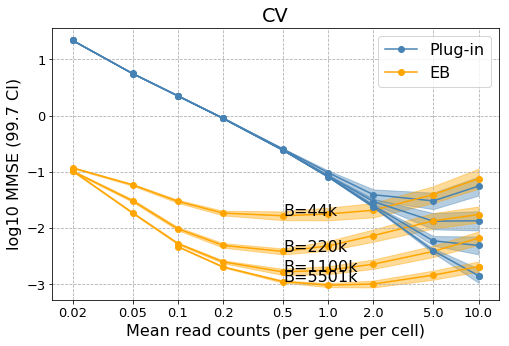

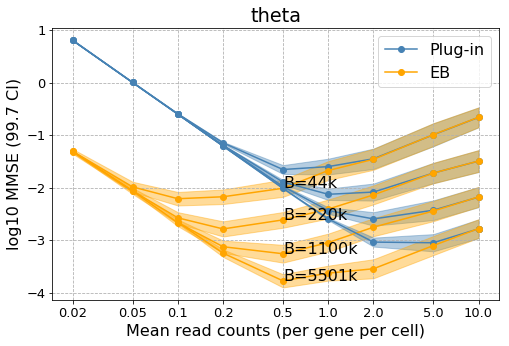

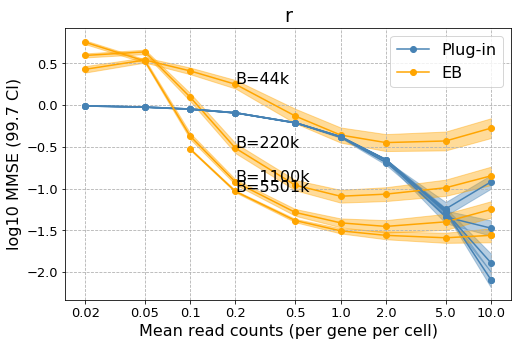

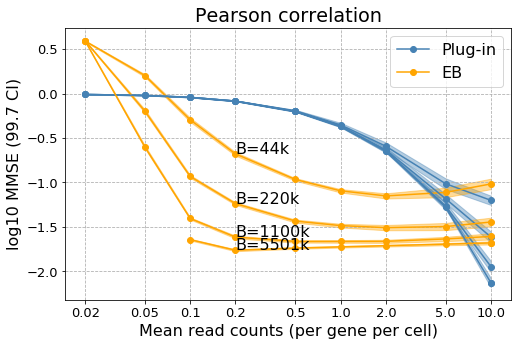

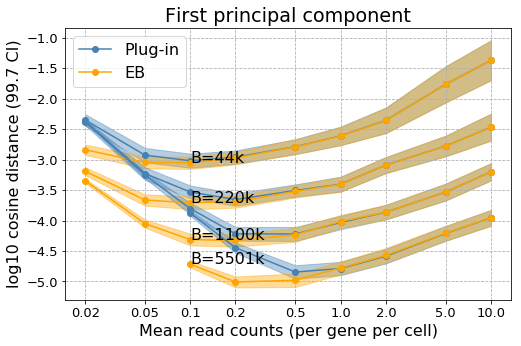

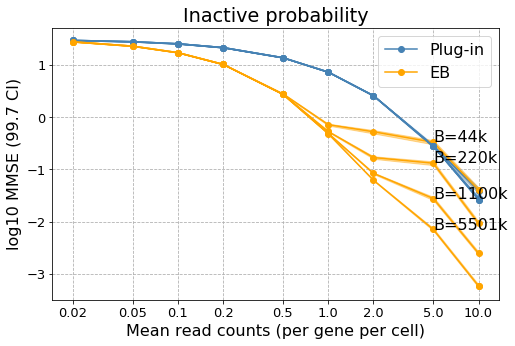

In [200]:
## On the large data
# opt_ref = 'ml_ref'
# opt_ref = 'dd_ref'

## Read data statistics 
fname = output_folder+'/data/tradeoff_data.pickle'
f_myfile = open(fname, 'rb')
error_ml_dic = pickle.load(f_myfile)
error_dd_dic = pickle.load(f_myfile)
f_myfile.close()

sd.plot_tradeoff_curve(error_ml_dic['cv'],error_dd_dic['cv'],output_folder=output_folder,suffix='cv',\
                       ylabel='log10 MMSE (99.7 CI)',title='CV',\
                      ann_ml=None,ann_dd=4)
sd.plot_tradeoff_curve(error_ml_dic['gamma_theta'],error_dd_dic['gamma_theta'],output_folder=output_folder,suffix='gamma_theta_',\
                       ylabel='log10 MMSE (99.7 CI)',title='theta (gamma)',\
                      ann_ml=None,ann_dd=4)
sd.plot_tradeoff_curve(error_ml_dic['gamma_r'],error_dd_dic['gamma_r'],output_folder=output_folder,suffix='gamma_r_',\
                       ylabel='log10 MMSE (99.7 CI)',title='r (gamma)',\
                      ann_ml=None,ann_dd=3)
sd.plot_tradeoff_curve(error_ml_dic['PC'],error_dd_dic['PC'],output_folder=output_folder,suffix='PeCo_',\
                       ylabel='log10 MMSE (99.7 CI)',title='Pearson correlation',\
                      ann_ml=None,ann_dd=3)
sd.plot_tradeoff_curve(error_ml_dic['PCA'],error_dd_dic['PCA'],output_folder=output_folder,suffix='PCA_',\
                       ylabel='log10 cosine distance (99.7 CI)',title='First principal component',\
                      ann_ml=None,ann_dd=2)
sd.plot_tradeoff_curve(error_ml_dic['zero'],error_dd_dic['zero'],output_folder=output_folder,suffix='zero',\
                       ylabel='log10 MMSE (99.7 CI)',title='Inactive probability',\
                      ann_ml=None,ann_dd=-2)

# old code

In [ ]:
## on large data (old code)
subsample_folder = '/data/martin/exp_sceb/subsample_1.3mil/subsampled_data'
filename_list = os.listdir(subsample_folder)
# opt_ref = 'ml_ref'
opt_ref = 'dd_ref'

test_list = ['cv','PC','PCA','zero','dist']

test_list = ['mean','var','cv','cov','PC','PCA','zero','pw_zero','dist']


## use a two-layer dic to store the result
err_ml_dic = {}
err_dd_dic = {}

for test_type in test_list:
    err_ml_dic[test_type] = {}
    err_dd_dic[test_type] = {}

## Initialization
for fname in filename_list:
    key_ = sd.fname_to_key(fname)
    for test_type in test_list:            
            err_ml_dic[test_type][key_] = []
            err_dd_dic[test_type][key_] = []
    
# if opt_ref == 'ml_ref':
#     cv_true = cv_ml_full
#     PC_true = PC_ml_full
#     V_true = V_ml_full
# else:
#     cv_true = cv_dd_full
#     PC_true = PC_dd_full
#     V_true = V_dd_full
    
for fname in filename_list:
    print(fname)
    data = sc.read(subsample_folder+'/'+fname)
    key_ = sd.fname_to_key(fname)
    B_,Nr_bar_,Nr_,Nc_ = sd.key_to_param(key_)
    
    ## CV estimation
    M_ml,M_dd = sd.dd_1d_moment(data,verbose=False)
    
    cv_ml = sd.M_to_cv(M_ml)
    cv_dd = sd.M_to_cv(M_dd)
    err_ml = np.log10(np.mean((cv_true-cv_ml)**2)) - np.log10(np.mean(cv_true**2))
    err_dd = np.log10(np.mean((cv_true-cv_dd)**2)) - np.log10(np.mean(cv_true**2))
    err_ml_dic['cv'][key_].append(err_ml)
    err_dd_dic['cv'][key_].append(err_dd)
    
    gamma_param_ml = sd.M_to_gamma(M_ml)
    gamma_param_ml[0] *= Nr/Nr_
    gamma_param_dd = sd.M_to_gamma(M_dd)
    gamma_param_dd[0] *= Nr/Nr_
    err_ml = np.log10(np.mean((gamma_param_true[0]-gamma_param_ml[0])**2))\
             - np.log10(np.mean(gamma_param_true[0]**2))
    err_dd = np.log10(np.mean((gamma_param_true[0]-gamma_param_dd[0])**2))\
             - np.log10(np.mean(gamma_param_true[0]**2))
    err_ml_dic['gamma_theta'][key_].append(err_ml)
    err_dd_dic['gamma_theta'][key_].append(err_dd)
    err_ml = np.log10(np.mean((gamma_param_true[1]-gamma_param_ml[1])**2))\
             - np.log10(np.mean(gamma_param_true[1]**2))
    err_dd = np.log10(np.mean((gamma_param_true[1]-gamma_param_dd[1])**2))\
             - np.log10(np.mean(gamma_param_true[1]**2))
    err_ml_dic['gamma_r'][key_].append(err_ml)
    err_dd_dic['gamma_r'][key_].append(err_dd)
            
    ## Pearson correlation, PCA
    mean_ml,cov_ml,PeCo_ml = sd.ml_covariance(data)
    mean_dd,cov_dd,PeCo_dd = sd.dd_covariance(data,PC_prune=False)
    
    err_ml = np.log10(sd.d_PC(PeCo_true,PeCo_ml)) - np.log10(np.mean(PeCo_true**2))
    err_dd = np.log10(sd.d_PC(PeCo_true,PeCo_dd)) - np.log10(np.mean(PeCo_true**2))
    err_ml_dic['PC'][key_].append(err_ml)
    err_dd_dic['PC'][key_].append(err_dd)
    
    _,V_ml = np.linalg.eigh(cov_ml)
    _,V_dd = np.linalg.eigh(cov_dd)
    err_ml = np.log10(sd.cosine_distance(V_true[:,-1],V_ml[:,-1]))
    err_ml_dic['PCA'][key_].append(err_ml)
    err_dd = np.log10(sd.cosine_distance(V_true[:,-1],V_dd[:,-1]))
    err_dd_dic['PCA'][key_].append(err_dd)
    
    ## zero
    p0_ml,p0_dd = sd.dd_inactive_prob(data,relative_depth=Nr_/Nr,verbose=False)
    err_ml = np.log10(np.mean((p0_ml-p0_true)**2)) - np.log10(np.mean(p0_true**2))
    err_dd = np.log10(np.mean((p0_dd-p0_true)**2)) - np.log10(np.mean(p0_true**2))
    err_ml_dic['zero'][key_].append(err_ml)
    err_dd_dic['zero'][key_].append(err_dd)
    
## Save the data
fname = output_folder+'/data/tradeoff_error_moment_statistics_'+opt_ref+'.pickle'
f_myfile = open(fname,'wb')
pickle.dump(err_ml_dic, f_myfile)
pickle.dump(err_dd_dic, f_myfile)
f_myfile.close()
print('Completed')

In [ ]:
## On the small data
# opt_ref = 'ml_ref'
# opt_ref = 'dd_ref'

## Read data statistics 
fname = output_folder+'/data/tradeoff_error_moment_statistics_smalldata.pickle'
f_myfile = open(fname, 'rb')
error_ml_dic = pickle.load(f_myfile)
error_dd_dic = pickle.load(f_myfile)
f_myfile.close()

sd.plot_tradeoff_curve(error_ml_dic['cv'],error_dd_dic['cv'],output_folder=output_folder,suffix='cv_small_'+opt_ref,\
                       ylabel='log10 MMSE (99.7 CI)',title='Tradeoff for estimating CV',\
                      ann_ml=-2,ann_dd=3)
sd.plot_tradeoff_curve(error_ml_dic['gamma_theta'],error_dd_dic['gamma_theta'],output_folder=output_folder,suffix='cv_small_'+opt_ref,\
                       ylabel='log10 MMSE (99.7 CI)',title='Tradeoff for estimating theta',\
                      ann_ml=-2,ann_dd=3)
sd.plot_tradeoff_curve(error_ml_dic['gamma_r'],error_dd_dic['gamma_r'],output_folder=output_folder,suffix='cv_small_'+opt_ref,\
                       ylabel='log10 MMSE (99.7 CI)',title='Tradeoff for estimating r',\
                      ann_ml=-2,ann_dd=3)
sd.plot_tradeoff_curve(error_ml_dic['PC'],error_dd_dic['PC'],output_folder=output_folder,suffix='PC_small_'+opt_ref,\
                       ylabel='log10 MMSE (99.7 CI)',title='Tradeoff for estimating PC',\
                      ann_ml=None,ann_dd=3)
sd.plot_tradeoff_curve(error_ml_dic['PCA'],error_dd_dic['PCA'],output_folder=output_folder,suffix='PCA_small_'+opt_ref,\
                       ylabel='log10 cosine distance (99.7 CI)',title='Tradeoff for estimating the first principal component',\
                      ann_ml=None,ann_dd=1)
sd.plot_tradeoff_curve(error_ml_dic['zero'],error_dd_dic['zero'],output_folder=output_folder,suffix='PCA_small_'+opt_ref,\
                       ylabel='log10 cosine distance (99.7 CI)',title='Tradeoff for estimating the inactive probability',\
                      ann_ml=None,ann_dd=1)

# Tradeoff curve 

In [52]:
def fname_to_key(fname):
    fname = os.path.splitext(fname)[0]
    fname = fname.strip().split('_')[1:]
    B,Nr_bar,Nr,Nc,i_rep = fname
    key_ = B+'_'+Nr_bar+'_'+Nr+'_'+Nc
    return key_
def key_to_param(key):
    key = key.strip().split('_')
    return int(key[0]),float(key[1]),float(key[2]),int(key[3])
def error_p0(p0,p0_true):
    p0 = p0.clip(min=1e-2)
    p0_true = p0_true.clip(min=1e-2)
    err = np.absolute(p0-p0_true)
    err = np.mean(err)
    return err

array([2.96894968, 3.30578115, 3.96037563, 3.63748973, 3.92329584,
       4.83619115])

In [87]:
output_folder = './figures/figure_tradeoff'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [25]:
subsample_folder = '/data/martin/exp_sceb/subsample_1.3mil/subsampled_data'
filename_list = os.listdir(subsample_folder)
data = load_10x_1_3mil_subsample()

In [27]:
## estimation for the full data 
M_ml_full,M_dd_full = sd.dd_1d_moment(data)
cv_full = M_to_cv(M_dd_full)

#time start: 0.0s
n_cell=1306127, n_gene=72
#total: 2.21s


In [24]:
def fname_to_key(fname):
    fname = os.path.splitext(fname)[0]
    fname = fname.strip().split('_')[1:]
    B,Nr_bar,Nr,Nc,i_rep = fname
    key_ = B+'_'+Nr_bar+'_'+Nr+'_'+Nc
    return key_
def key_to_param(key):
    key = key.strip().split('_')
    return int(key[0]),float(key[1]),float(key[2]),int(key[3])
def error_p0(p0,p0_true):
    p0 = p0.clip(min=1e-2)
    p0_true = p0_true.clip(min=1e-2)
    err = np.absolute(p0-p0_true)
    err = np.mean(err)
    return err

In [28]:
cv_full

array([0.67118757, 0.75834716, 0.6602818 , 0.58144109, 0.77041579,
       0.68435777, 0.79793916, 0.9259921 , 0.77732598, 0.75064368,
       0.73904238, 0.60205018, 0.676361  , 0.62285768, 0.77145022,
       0.76835441, 0.70727831, 1.17550348, 0.66245266, 0.85633361,
       0.74386775, 0.70875382, 0.68459303, 0.73460693, 0.78884615,
       0.7699657 , 0.72890069, 0.74315274, 0.76808419, 7.74479418,
       0.70953719, 3.65184769, 0.90827814, 0.69796299, 0.72318852,
       0.90694138, 0.74882011, 0.72939653, 0.72975693, 0.75048699,
       0.86553777, 0.74030876, 8.40709387, 8.45303718, 0.63511983,
       0.68632484, 0.75724676, 0.67740335, 1.00607525, 0.6218325 ,
       0.74201477, 0.79312551, 0.68703608, 0.86688935, 0.73164384,
       0.89537009, 0.70500911, 0.86314055, 0.91515332, 0.84033971,
       0.75758592, 0.71766975, 0.71522159, 0.66849271, 0.6749197 ,
       0.69934438, 0.81436133, 0.66324228, 0.6624021 , 0.62002463,
       0.65024668, 0.6243055 ])

In [30]:
data = sc.read(subsample_folder+'/'+fname)
# size_factor = 
M_ml, M_dd = sd.dd_1d_moment(data,verbose=False)

In [33]:
## collect the estimation error 
error_ml_dic = {}
error_dd_dic = {}

for fname in filename_list:
    key_ = fname_to_key(fname)
    error_ml_dic[key_] = []
    error_dd_dic[key_] = []
    
for fname in filename_list:
    print(fname)
    data = sc.read(subsample_folder+'/'+fname)
#     size_factor = sd.
    M_ml, M_dd = sd.dd_1d_moment(data,verbose=False)

    key_ = fname_to_key(fname)
    err_ml = np.log10(np.mean((cv_full - M_to_cv(M_ml))**2))
    error_ml_dic[key_].append(err_ml)
    err_dd = np.log10(np.mean((cv_full - M_to_cv(M_dd))**2))
    error_dd_dic[key_].append(err_dd)

data_165055_0.5_36.0_4584_0.h5ad
data_165055_0.5_36.0_4584_1.h5ad
data_165055_0.5_36.0_4584_2.h5ad
data_165055_0.5_36.0_4584_3.h5ad
data_165055_0.5_36.0_4584_4.h5ad
data_165055_0.5_36.0_4584_5.h5ad
data_165055_0.5_36.0_4584_6.h5ad
data_165055_0.5_36.0_4584_7.h5ad
data_165055_0.5_36.0_4584_8.h5ad
data_165055_0.5_36.0_4584_9.h5ad
data_165055_1.0_72.0_2292_0.h5ad
data_165055_1.0_72.0_2292_1.h5ad
data_165055_1.0_72.0_2292_2.h5ad
data_165055_1.0_72.0_2292_3.h5ad
data_165055_1.0_72.0_2292_4.h5ad
data_165055_1.0_72.0_2292_5.h5ad
data_165055_1.0_72.0_2292_6.h5ad
data_165055_1.0_72.0_2292_7.h5ad
data_165055_1.0_72.0_2292_8.h5ad
data_165055_1.0_72.0_2292_9.h5ad
data_165055_2.0_144.0_1146_0.h5ad
data_165055_2.0_144.0_1146_1.h5ad
data_165055_2.0_144.0_1146_2.h5ad
data_165055_2.0_144.0_1146_3.h5ad
data_165055_2.0_144.0_1146_4.h5ad
data_165055_2.0_144.0_1146_5.h5ad
data_165055_2.0_144.0_1146_6.h5ad
data_165055_2.0_144.0_1146_7.h5ad
data_165055_2.0_144.0_1146_8.h5ad
data_165055_2.0_144.0_1146_9.h5ad


data_1650557_0.5_36.0_45848_5.h5ad
data_1650557_0.5_36.0_45848_6.h5ad
data_1650557_0.5_36.0_45848_7.h5ad
data_1650557_0.5_36.0_45848_8.h5ad
data_1650557_0.5_36.0_45848_9.h5ad
data_1650557_1.0_72.0_22924_0.h5ad
data_1650557_1.0_72.0_22924_1.h5ad
data_1650557_1.0_72.0_22924_2.h5ad
data_1650557_1.0_72.0_22924_3.h5ad
data_1650557_1.0_72.0_22924_4.h5ad
data_1650557_1.0_72.0_22924_5.h5ad
data_1650557_1.0_72.0_22924_6.h5ad
data_1650557_1.0_72.0_22924_7.h5ad
data_1650557_1.0_72.0_22924_8.h5ad
data_1650557_1.0_72.0_22924_9.h5ad
data_1650557_2.0_144.0_11462_0.h5ad
data_1650557_2.0_144.0_11462_1.h5ad
data_1650557_2.0_144.0_11462_2.h5ad
data_1650557_2.0_144.0_11462_3.h5ad
data_1650557_2.0_144.0_11462_4.h5ad
data_1650557_2.0_144.0_11462_5.h5ad
data_1650557_2.0_144.0_11462_6.h5ad
data_1650557_2.0_144.0_11462_7.h5ad
data_1650557_2.0_144.0_11462_8.h5ad
data_1650557_2.0_144.0_11462_9.h5ad
data_1650557_3.0_216.0_7641_0.h5ad
data_1650557_3.0_216.0_7641_1.h5ad
data_1650557_3.0_216.0_7641_2.h5ad
data_16505

data_165055_1.0_72.0_2292_95.h5ad
data_165055_1.0_72.0_2292_96.h5ad
data_165055_1.0_72.0_2292_97.h5ad
data_165055_1.0_72.0_2292_98.h5ad
data_165055_1.0_72.0_2292_99.h5ad
data_165055_2.0_144.0_1146_10.h5ad
data_165055_2.0_144.0_1146_11.h5ad
data_165055_2.0_144.0_1146_12.h5ad
data_165055_2.0_144.0_1146_13.h5ad
data_165055_2.0_144.0_1146_14.h5ad
data_165055_2.0_144.0_1146_15.h5ad
data_165055_2.0_144.0_1146_16.h5ad
data_165055_2.0_144.0_1146_17.h5ad
data_165055_2.0_144.0_1146_18.h5ad
data_165055_2.0_144.0_1146_19.h5ad
data_165055_2.0_144.0_1146_20.h5ad
data_165055_2.0_144.0_1146_21.h5ad
data_165055_2.0_144.0_1146_22.h5ad
data_165055_2.0_144.0_1146_23.h5ad
data_165055_2.0_144.0_1146_24.h5ad
data_165055_2.0_144.0_1146_25.h5ad
data_165055_2.0_144.0_1146_26.h5ad
data_165055_2.0_144.0_1146_27.h5ad
data_165055_2.0_144.0_1146_28.h5ad
data_165055_2.0_144.0_1146_29.h5ad
data_165055_2.0_144.0_1146_30.h5ad
data_165055_2.0_144.0_1146_31.h5ad
data_165055_2.0_144.0_1146_32.h5ad
data_165055_2.0_144.0_114

data_165055_4.0_288.0_573_80.h5ad
data_165055_4.0_288.0_573_81.h5ad
data_165055_4.0_288.0_573_82.h5ad
data_165055_4.0_288.0_573_83.h5ad
data_165055_4.0_288.0_573_84.h5ad
data_165055_4.0_288.0_573_85.h5ad
data_165055_4.0_288.0_573_86.h5ad
data_165055_4.0_288.0_573_87.h5ad
data_165055_4.0_288.0_573_88.h5ad
data_165055_4.0_288.0_573_89.h5ad
data_165055_4.0_288.0_573_90.h5ad
data_165055_4.0_288.0_573_91.h5ad
data_165055_4.0_288.0_573_92.h5ad
data_165055_4.0_288.0_573_93.h5ad
data_165055_4.0_288.0_573_94.h5ad
data_165055_4.0_288.0_573_95.h5ad
data_165055_4.0_288.0_573_96.h5ad
data_165055_4.0_288.0_573_97.h5ad
data_165055_4.0_288.0_573_98.h5ad
data_165055_4.0_288.0_573_99.h5ad
data_165055_5.0_360.0_458_10.h5ad
data_165055_5.0_360.0_458_11.h5ad
data_165055_5.0_360.0_458_12.h5ad
data_165055_5.0_360.0_458_13.h5ad
data_165055_5.0_360.0_458_14.h5ad
data_165055_5.0_360.0_458_15.h5ad
data_165055_5.0_360.0_458_16.h5ad
data_165055_5.0_360.0_458_17.h5ad
data_165055_5.0_360.0_458_18.h5ad
data_165055_5.

data_165055_10.0_720.0_229_67.h5ad
data_165055_10.0_720.0_229_68.h5ad
data_165055_10.0_720.0_229_69.h5ad
data_165055_10.0_720.0_229_70.h5ad
data_165055_10.0_720.0_229_71.h5ad
data_165055_10.0_720.0_229_72.h5ad
data_165055_10.0_720.0_229_73.h5ad
data_165055_10.0_720.0_229_74.h5ad
data_165055_10.0_720.0_229_75.h5ad
data_165055_10.0_720.0_229_76.h5ad
data_165055_10.0_720.0_229_77.h5ad
data_165055_10.0_720.0_229_78.h5ad
data_165055_10.0_720.0_229_79.h5ad
data_165055_10.0_720.0_229_80.h5ad
data_165055_10.0_720.0_229_81.h5ad
data_165055_10.0_720.0_229_82.h5ad
data_165055_10.0_720.0_229_83.h5ad
data_165055_10.0_720.0_229_84.h5ad
data_165055_10.0_720.0_229_85.h5ad
data_165055_10.0_720.0_229_86.h5ad
data_165055_10.0_720.0_229_87.h5ad
data_165055_10.0_720.0_229_88.h5ad
data_165055_10.0_720.0_229_89.h5ad
data_165055_10.0_720.0_229_90.h5ad
data_165055_10.0_720.0_229_91.h5ad
data_165055_10.0_720.0_229_92.h5ad
data_165055_10.0_720.0_229_93.h5ad
data_165055_10.0_720.0_229_94.h5ad
data_165055_10.0_720

data_330111_2.0_144.0_2292_42.h5ad
data_330111_2.0_144.0_2292_43.h5ad
data_330111_2.0_144.0_2292_44.h5ad
data_330111_2.0_144.0_2292_45.h5ad
data_330111_2.0_144.0_2292_46.h5ad
data_330111_2.0_144.0_2292_47.h5ad
data_330111_2.0_144.0_2292_48.h5ad
data_330111_2.0_144.0_2292_49.h5ad
data_330111_2.0_144.0_2292_50.h5ad
data_330111_2.0_144.0_2292_51.h5ad
data_330111_2.0_144.0_2292_52.h5ad
data_330111_2.0_144.0_2292_53.h5ad
data_330111_2.0_144.0_2292_54.h5ad
data_330111_2.0_144.0_2292_55.h5ad
data_330111_2.0_144.0_2292_56.h5ad
data_330111_2.0_144.0_2292_57.h5ad
data_330111_2.0_144.0_2292_58.h5ad
data_330111_2.0_144.0_2292_59.h5ad
data_330111_2.0_144.0_2292_60.h5ad
data_330111_2.0_144.0_2292_61.h5ad
data_330111_2.0_144.0_2292_62.h5ad
data_330111_2.0_144.0_2292_63.h5ad
data_330111_2.0_144.0_2292_64.h5ad
data_330111_2.0_144.0_2292_65.h5ad
data_330111_2.0_144.0_2292_66.h5ad
data_330111_2.0_144.0_2292_67.h5ad
data_330111_2.0_144.0_2292_68.h5ad
data_330111_2.0_144.0_2292_69.h5ad
data_330111_2.0_144.

data_330111_5.0_360.0_916_13.h5ad
data_330111_5.0_360.0_916_14.h5ad
data_330111_5.0_360.0_916_15.h5ad
data_330111_5.0_360.0_916_16.h5ad
data_330111_5.0_360.0_916_17.h5ad
data_330111_5.0_360.0_916_18.h5ad
data_330111_5.0_360.0_916_19.h5ad
data_330111_5.0_360.0_916_20.h5ad
data_330111_5.0_360.0_916_21.h5ad
data_330111_5.0_360.0_916_22.h5ad
data_330111_5.0_360.0_916_23.h5ad
data_330111_5.0_360.0_916_24.h5ad
data_330111_5.0_360.0_916_25.h5ad
data_330111_5.0_360.0_916_26.h5ad
data_330111_5.0_360.0_916_27.h5ad
data_330111_5.0_360.0_916_28.h5ad
data_330111_5.0_360.0_916_29.h5ad
data_330111_5.0_360.0_916_30.h5ad
data_330111_5.0_360.0_916_31.h5ad
data_330111_5.0_360.0_916_32.h5ad
data_330111_5.0_360.0_916_33.h5ad
data_330111_5.0_360.0_916_34.h5ad
data_330111_5.0_360.0_916_35.h5ad
data_330111_5.0_360.0_916_36.h5ad
data_330111_5.0_360.0_916_37.h5ad
data_330111_5.0_360.0_916_38.h5ad
data_330111_5.0_360.0_916_39.h5ad
data_330111_5.0_360.0_916_40.h5ad
data_330111_5.0_360.0_916_41.h5ad
data_330111_5.

data_330111_10.0_720.0_458_88.h5ad
data_330111_10.0_720.0_458_89.h5ad
data_330111_10.0_720.0_458_90.h5ad
data_330111_10.0_720.0_458_91.h5ad
data_330111_10.0_720.0_458_92.h5ad
data_330111_10.0_720.0_458_93.h5ad
data_330111_10.0_720.0_458_94.h5ad
data_330111_10.0_720.0_458_95.h5ad
data_330111_10.0_720.0_458_96.h5ad
data_330111_10.0_720.0_458_97.h5ad
data_330111_10.0_720.0_458_98.h5ad
data_330111_10.0_720.0_458_99.h5ad
data_825278_0.5_36.0_22924_10.h5ad
data_825278_0.5_36.0_22924_11.h5ad
data_825278_0.5_36.0_22924_12.h5ad
data_825278_0.5_36.0_22924_13.h5ad
data_825278_0.5_36.0_22924_14.h5ad
data_825278_0.5_36.0_22924_15.h5ad
data_825278_0.5_36.0_22924_16.h5ad
data_825278_0.5_36.0_22924_17.h5ad
data_825278_0.5_36.0_22924_18.h5ad
data_825278_0.5_36.0_22924_19.h5ad
data_825278_0.5_36.0_22924_20.h5ad
data_825278_0.5_36.0_22924_21.h5ad
data_825278_0.5_36.0_22924_22.h5ad
data_825278_0.5_36.0_22924_23.h5ad
data_825278_0.5_36.0_22924_24.h5ad
data_825278_0.5_36.0_22924_25.h5ad
data_825278_0.5_36.0

data_825278_2.0_144.0_5731_53.h5ad
data_825278_2.0_144.0_5731_54.h5ad
data_825278_2.0_144.0_5731_55.h5ad
data_825278_2.0_144.0_5731_56.h5ad
data_825278_2.0_144.0_5731_57.h5ad
data_825278_2.0_144.0_5731_58.h5ad
data_825278_2.0_144.0_5731_59.h5ad
data_825278_2.0_144.0_5731_60.h5ad
data_825278_2.0_144.0_5731_61.h5ad
data_825278_2.0_144.0_5731_62.h5ad
data_825278_2.0_144.0_5731_63.h5ad
data_825278_2.0_144.0_5731_64.h5ad
data_825278_2.0_144.0_5731_65.h5ad
data_825278_2.0_144.0_5731_66.h5ad
data_825278_2.0_144.0_5731_67.h5ad
data_825278_2.0_144.0_5731_68.h5ad
data_825278_2.0_144.0_5731_69.h5ad
data_825278_2.0_144.0_5731_70.h5ad
data_825278_2.0_144.0_5731_71.h5ad
data_825278_2.0_144.0_5731_72.h5ad
data_825278_2.0_144.0_5731_73.h5ad
data_825278_2.0_144.0_5731_74.h5ad
data_825278_2.0_144.0_5731_75.h5ad
data_825278_2.0_144.0_5731_76.h5ad
data_825278_2.0_144.0_5731_77.h5ad
data_825278_2.0_144.0_5731_78.h5ad
data_825278_2.0_144.0_5731_79.h5ad
data_825278_2.0_144.0_5731_80.h5ad
data_825278_2.0_144.

data_825278_5.0_360.0_2292_25.h5ad
data_825278_5.0_360.0_2292_26.h5ad
data_825278_5.0_360.0_2292_27.h5ad
data_825278_5.0_360.0_2292_28.h5ad
data_825278_5.0_360.0_2292_29.h5ad
data_825278_5.0_360.0_2292_30.h5ad
data_825278_5.0_360.0_2292_31.h5ad
data_825278_5.0_360.0_2292_32.h5ad
data_825278_5.0_360.0_2292_33.h5ad
data_825278_5.0_360.0_2292_34.h5ad
data_825278_5.0_360.0_2292_35.h5ad
data_825278_5.0_360.0_2292_36.h5ad
data_825278_5.0_360.0_2292_37.h5ad
data_825278_5.0_360.0_2292_38.h5ad
data_825278_5.0_360.0_2292_39.h5ad
data_825278_5.0_360.0_2292_40.h5ad
data_825278_5.0_360.0_2292_41.h5ad
data_825278_5.0_360.0_2292_42.h5ad
data_825278_5.0_360.0_2292_43.h5ad
data_825278_5.0_360.0_2292_44.h5ad
data_825278_5.0_360.0_2292_45.h5ad
data_825278_5.0_360.0_2292_46.h5ad
data_825278_5.0_360.0_2292_47.h5ad
data_825278_5.0_360.0_2292_48.h5ad
data_825278_5.0_360.0_2292_49.h5ad
data_825278_5.0_360.0_2292_50.h5ad
data_825278_5.0_360.0_2292_51.h5ad
data_825278_5.0_360.0_2292_52.h5ad
data_825278_5.0_360.

data_825278_10.0_720.0_1146_85.h5ad
data_825278_10.0_720.0_1146_86.h5ad
data_825278_10.0_720.0_1146_87.h5ad
data_825278_10.0_720.0_1146_88.h5ad
data_825278_10.0_720.0_1146_89.h5ad
data_825278_10.0_720.0_1146_90.h5ad
data_825278_10.0_720.0_1146_91.h5ad
data_825278_10.0_720.0_1146_92.h5ad
data_825278_10.0_720.0_1146_93.h5ad
data_825278_10.0_720.0_1146_94.h5ad
data_825278_10.0_720.0_1146_95.h5ad
data_825278_10.0_720.0_1146_96.h5ad
data_825278_10.0_720.0_1146_97.h5ad
data_825278_10.0_720.0_1146_98.h5ad
data_825278_10.0_720.0_1146_99.h5ad
data_1650557_0.5_36.0_45848_10.h5ad
data_1650557_0.5_36.0_45848_11.h5ad
data_1650557_0.5_36.0_45848_12.h5ad
data_1650557_0.5_36.0_45848_13.h5ad
data_1650557_0.5_36.0_45848_14.h5ad
data_1650557_0.5_36.0_45848_15.h5ad
data_1650557_0.5_36.0_45848_16.h5ad
data_1650557_0.5_36.0_45848_17.h5ad
data_1650557_0.5_36.0_45848_18.h5ad
data_1650557_0.5_36.0_45848_19.h5ad
data_1650557_0.5_36.0_45848_20.h5ad
data_1650557_0.5_36.0_45848_21.h5ad
data_1650557_0.5_36.0_45848_

data_1650557_2.0_144.0_11462_42.h5ad
data_1650557_2.0_144.0_11462_43.h5ad
data_1650557_2.0_144.0_11462_44.h5ad
data_1650557_2.0_144.0_11462_45.h5ad
data_1650557_2.0_144.0_11462_46.h5ad
data_1650557_2.0_144.0_11462_47.h5ad
data_1650557_2.0_144.0_11462_48.h5ad
data_1650557_2.0_144.0_11462_49.h5ad
data_1650557_2.0_144.0_11462_50.h5ad
data_1650557_2.0_144.0_11462_51.h5ad
data_1650557_2.0_144.0_11462_52.h5ad
data_1650557_2.0_144.0_11462_53.h5ad
data_1650557_2.0_144.0_11462_54.h5ad
data_1650557_2.0_144.0_11462_55.h5ad
data_1650557_2.0_144.0_11462_56.h5ad
data_1650557_2.0_144.0_11462_57.h5ad
data_1650557_2.0_144.0_11462_58.h5ad
data_1650557_2.0_144.0_11462_59.h5ad
data_1650557_2.0_144.0_11462_60.h5ad
data_1650557_2.0_144.0_11462_61.h5ad
data_1650557_2.0_144.0_11462_62.h5ad
data_1650557_2.0_144.0_11462_63.h5ad
data_1650557_2.0_144.0_11462_64.h5ad
data_1650557_2.0_144.0_11462_65.h5ad
data_1650557_2.0_144.0_11462_66.h5ad
data_1650557_2.0_144.0_11462_67.h5ad
data_1650557_2.0_144.0_11462_68.h5ad
d

data_1650557_4.0_288.0_5731_90.h5ad
data_1650557_4.0_288.0_5731_91.h5ad
data_1650557_4.0_288.0_5731_92.h5ad
data_1650557_4.0_288.0_5731_93.h5ad
data_1650557_4.0_288.0_5731_94.h5ad
data_1650557_4.0_288.0_5731_95.h5ad
data_1650557_4.0_288.0_5731_96.h5ad
data_1650557_4.0_288.0_5731_97.h5ad
data_1650557_4.0_288.0_5731_98.h5ad
data_1650557_4.0_288.0_5731_99.h5ad
data_1650557_5.0_360.0_4584_10.h5ad
data_1650557_5.0_360.0_4584_11.h5ad
data_1650557_5.0_360.0_4584_12.h5ad
data_1650557_5.0_360.0_4584_13.h5ad
data_1650557_5.0_360.0_4584_14.h5ad
data_1650557_5.0_360.0_4584_15.h5ad
data_1650557_5.0_360.0_4584_16.h5ad
data_1650557_5.0_360.0_4584_17.h5ad
data_1650557_5.0_360.0_4584_18.h5ad
data_1650557_5.0_360.0_4584_19.h5ad
data_1650557_5.0_360.0_4584_20.h5ad
data_1650557_5.0_360.0_4584_21.h5ad
data_1650557_5.0_360.0_4584_22.h5ad
data_1650557_5.0_360.0_4584_23.h5ad
data_1650557_5.0_360.0_4584_24.h5ad
data_1650557_5.0_360.0_4584_25.h5ad
data_1650557_5.0_360.0_4584_26.h5ad
data_1650557_5.0_360.0_4584_

data_1650557_10.0_720.0_2292_48.h5ad
data_1650557_10.0_720.0_2292_49.h5ad
data_1650557_10.0_720.0_2292_50.h5ad
data_1650557_10.0_720.0_2292_51.h5ad
data_1650557_10.0_720.0_2292_52.h5ad
data_1650557_10.0_720.0_2292_53.h5ad
data_1650557_10.0_720.0_2292_54.h5ad
data_1650557_10.0_720.0_2292_55.h5ad
data_1650557_10.0_720.0_2292_56.h5ad
data_1650557_10.0_720.0_2292_57.h5ad
data_1650557_10.0_720.0_2292_58.h5ad
data_1650557_10.0_720.0_2292_59.h5ad
data_1650557_10.0_720.0_2292_60.h5ad
data_1650557_10.0_720.0_2292_61.h5ad
data_1650557_10.0_720.0_2292_62.h5ad
data_1650557_10.0_720.0_2292_63.h5ad
data_1650557_10.0_720.0_2292_64.h5ad
data_1650557_10.0_720.0_2292_65.h5ad
data_1650557_10.0_720.0_2292_66.h5ad
data_1650557_10.0_720.0_2292_67.h5ad
data_1650557_10.0_720.0_2292_68.h5ad
data_1650557_10.0_720.0_2292_69.h5ad
data_1650557_10.0_720.0_2292_70.h5ad
data_1650557_10.0_720.0_2292_71.h5ad
data_1650557_10.0_720.0_2292_72.h5ad
data_1650557_10.0_720.0_2292_73.h5ad
data_1650557_10.0_720.0_2292_74.h5ad
d

In [90]:
## given the error, generate a plot with different budgets 

def plot_budget(error_ml_dic,error_dd_dic,output_folder=output_folder,suffix='_cv'):
    B_list = []
    Nr_bar_list = []
    CI = 0.2
    for key_ in error_ml_dic.keys():
        B,Nr_bar,_,_ = key_to_param(key_)
        if B not in B_list: B_list.append(B)
        if Nr_bar not in Nr_bar_list: Nr_bar_list.append(Nr_bar)
    B_list = np.sort(np.array(B_list))
    Nr_bar_list = np.sort(np.array(Nr_bar_list))  
    n_Nr = Nr_bar_list.shape[0]
    
    plt.figure(figsize=[18,8])
    for B in B_list:
        err_ml = np.zeros([n_Nr])
        std_ml = np.zeros([n_Nr])
        err_dd = np.zeros([n_Nr])
        std_dd = np.zeros([n_Nr])
        
        for i_Nr,val_Nr in enumerate(Nr_bar_list):
            for key_ in error_ml_dic.keys():
                B_,Nr_bar_,_,_ = key_to_param(key_)
                if B == B_ and Nr_bar_ == val_Nr:
                    err_ml[i_Nr] = np.array(error_ml_dic[key_]).mean()
                    std_ml[i_Nr] = np.array(error_ml_dic[key_]).std()
                    err_dd[i_Nr] = np.array(error_dd_dic[key_]).mean()
                    std_dd[i_Nr] = np.array(error_dd_dic[key_]).std()
                    
        plt.plot(Nr_bar_list,err_ml,label='ml B=%d'%B,marker='o',color='orange')
        plt.fill_between(Nr_bar_list,err_ml-CI*std_ml,err_ml+CI*std_ml,alpha=0.4,color='orange')
        
        plt.plot(Nr_bar_list,err_dd,label='dd B=%d'%B,marker='o',color='steelblue')
        
        plt.fill_between(Nr_bar_list,err_dd-CI*std_dd,err_dd+CI*std_dd,alpha=0.4,color='steelblue')

        
    plt.xlabel('Mean reads per gene per cell')
    plt.ylabel('log10 MMSE')
#     plt.ylabel
    plt.legend(bbox_to_anchor=(1.15, 1))
#     plt.show()
    plt.savefig(output_folder+'/tradeoff_curve'+suffix+'.png')
    plt.close('all')
    print(output_folder+'/tradeoff_curve'+suffix+'.png')

In [91]:
plot_budget(error_ml_dic,error_dd_dic,output_folder=output_folder,suffix='_cv')

./figures/figure_tradeoff/tradeoff_curve_cv.png


In [96]:
error_ml_dic['165055_0.5_36.0_4584'],

[-0.005302993698647187,
 -0.033150602658148384,
 -0.015963836924870023,
 -0.011940312502634906,
 0.02260852464855873,
 -0.021524638594009736,
 -0.0038035294877498296,
 -0.017396360018612066,
 -0.02377281137451909,
 -0.029811190782923637,
 -0.01277772060489693,
 -0.029725747109161683,
 -0.01636514433575612,
 -0.012001793343123034,
 0.015556691948517559,
 -0.01560057158228246,
 -0.01940182268083538,
 0.02624921833753963,
 -0.009786704032173285,
 -0.00327805136447631,
 0.0003201260215148867,
 -0.004508461678945522,
 -0.012848455907265523,
 -0.005407714764108003,
 -0.020079467230108037,
 -0.01447386052561346,
 -0.021498831797941608,
 0.0066884010476865735,
 -0.01622992787122433,
 -0.018807156003793166,
 -0.022261548473890457,
 -0.016297707093176548,
 -0.009510878138290662,
 -0.017408959314946765,
 -0.02054739136590429,
 -0.026917320694620914,
 -0.00642653496177644,
 -0.029037186349138138,
 0.04290773436220949,
 0.006073626458398637,
 -0.016002205610665853,
 0.0023851249120155943,
 -0.01549

In [2]:
data = load_10x_1k() ## 1k brain cells sc.pp.filter_genes(data,min_counts=1*data.shape[0])
# data = data[:,[0,1,2,3,4,5]]
print(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
AnnData object with n_obs × n_vars = 931 × 1770 
    var: 'n_counts'


In [152]:
data_sub = sd.subsamp_anndata(data,10,800)

#time start: 0.0s
before cell subsamp (931, 1770)
after cell subsamp (800, 1770)
#time sub-sample cells: 0.0179s
[[ 1.  1.  0. ...  2. 56.  7.]
 [ 1.  2.  1. ...  4. 41.  4.]
 [ 3.  0.  2. ...  2. 22.  0.]
 ...
 [ 2.  1.  1. ...  5. 60.  0.]
 [ 2.  4.  4. ...  5. 74.  4.]
 [ 5.  2.  3. ...  3. 43.  1.]]
[[ 1  1  0 ...  2 56  7]
 [ 1  2  1 ...  4 41  4]
 [ 3  0  2 ...  2 22  0]
 ...
 [ 2  1  1 ...  5 60  0]
 [ 2  4  4 ...  5 74  4]
 [ 5  2  3 ...  3 43  1]]
#time sub-sample counts: 3.2151s



In [3]:
data_13m = load_10x_1_3mil()
sc.pp.filter_genes(data_13m,min_counts=5*data_13m.shape[0])

In [6]:
Nc,G = data_13m.shape
Nr = data_13m.X.sum()/Nc
B = Nc*Nr
Nr_bar = Nr/G
print(B,Nc,Nr,Nr_bar)

2386569984.0 1306127 1827.2112773107056 12.100736935832487


In [81]:
B_sub_list = [int(B/10000),int(B/5000),int(B/2000),int(B/1000)]
param=[]
for B_sub in B_sub_list:
    for Nr_bar in [0.1,0.2,0.5,1,2,3,4,5,8,10]:
        param.append((B_sub,Nr_bar,Nr_bar*G,int(B_sub/Nr_bar/G)))

In [82]:
data_subsamp = {}
for i in range(len(param)):
    _,Nr_bar_,Nr_,Nc_ = param[i]
    data_subsamp[param[i]]=sd.subsamp_anndata(data_13m,Nr_,Nc_)


#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (15805, 151)
#time sub-sample cells: 0.1561s
## 5000 cells processed
## 10000 cells processed
## 15000 cells processed
#time sub-sample counts: 18.2360s

#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (7902, 151)
#time sub-sample cells: 0.1370s
## 5000 cells processed
#time sub-sample counts: 8.9517s

#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (3161, 151)
#time sub-sample cells: 0.1066s
#time sub-sample counts: 3.9515s

#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (1580, 151)
#time sub-sample cells: 0.0834s
#time sub-sample counts: 1.9500s

#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (790, 151)
#time sub-sample cells: 0.1033s
#time sub-sample counts: 1.0538s

#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (526, 151)
#time sub-sample cells: 0.0889s
#time sub-sample counts: 0.7433s

#t

#time sub-sample counts: 2.7223s

#time start: 0.0s
before cell subsamp (1306127, 151)
after cell subsamp (1580, 151)
#time sub-sample cells: 0.1121s
#time sub-sample counts: 2.2115s



In [83]:
gamma_c = sd.sf(data_13m,verbose=False)
M,M_ml,gene_list = sd.dd_moment_anndata(data_13m,gamma_c=gamma_c,verbose=False)

In [84]:
M_sub,Mml_sub = {},{}
for key in data_subsamp.keys():
    gamma_c = sd.sf(data_subsamp[key],verbose=False)
    M_sub[key],Mml_sub[key],_ = sd.dd_moment_anndata(data_subsamp[key],gamma_c=gamma_c,verbose=False)

In [95]:
(cv**2).mean()

1.652677967338842

In [94]:
np.log10((cv**2).mean())

0.21818823733867598

In [88]:
err_list_tot_ = {}
err_list_ml_tot_ = {}
Nr_bar_list_tot_ = {}
Nc_list_tot_ = {}

for B_sub in B_sub_list:
    err_list_ = []
    err_list_ml_ = []
    Nr_bar_list_ = []
    Nc_list_ = []
    for key in data_subsamp.keys():
        B_,Nr_bar_,Nr_,Nc_ = key
        if B_ == B_sub:
            _,_,cv_dd,_= sd.basic_cal(M_sub[key])
            _,_,cv_ml,_= sd.basic_cal(Mml_sub[key])
            _,_,cv,_= sd.basic_cal(M)
            err_list_.append(np.log10(np.mean((cv_dd-cv)**2)))
            err_list_ml_.append(np.log10(np.mean((cv_dd-cv_ml)**2)))
            Nr_bar_list_.append(Nr_bar_)
            Nc_list_.append(Nc_)
            
    err_list_ = np.array(err_list_)
    err_list_ml_ = np.array(err_list_ml_)
    Nr_bar_list_ = np.array(Nr_bar_list_)
    Nc_list_ = np.array(Nc_list_)
    
    sort_idx = np.argsort(Nr_bar_list_)
    err_list_ = err_list_[sort_idx]
    err_list_ml_ = err_list_ml_[sort_idx]
    Nr_bar_list_ = Nr_bar_list_[sort_idx]
    Nc_list_ = Nc_list_[sort_idx]
            
    err_list_tot_[B_sub] = err_list_
    err_list_ml_tot_[B_sub] = err_list_ml_
    Nr_bar_list_tot_[B_sub] = Nr_bar_list_
    Nc_list_tot_[B_sub] = Nc_list_